# CS549 Machine Learning 
# Assignment 3: Logistic Regression Model

**Author:** Yang Xu, Assistant Professor of Computer Science, San Diego State University


### Total: 15 points

In this assignment, you will train a logistic regression model that classifies two categories of sign language images. The original data can be obtained from https://www.kaggle.com/ardamavi/sign-language-digits-dataset (preprocessed) or https://github.com/ardamavi/Sign-Language-Digits-Dataset (raw).

Your goal is to run all the cells below one by one from top to bottom. Before you run some task cells, you need to complete the missing lines (notified by "= None" in Python) in them. 

For each **task** cell that requires your completion, you can run the **evaluation** cell right after it to check if your answer correct.
The output of the evaluation cell should be the same as the "expected output" provided. (Some mismatch in the last digit of floating numbers is tolerable)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: Make sure you run `pip install -U scikit-image` in your command line 
# to have the newest version of scikit-image installed.
# from skimage.io import imsave
%matplotlib inline

# Load data and preprocess

First, you need to make sure that the **X.npy** and **Y.npy** file are included at the same folder of this notebook.

The original data have 10 categories, labelled by digit 0 to 9. 
We choose the image of sign ***three*** and ***four*** as the two categories to train our binary classifier.
The label for sign "three" is 0, and the label for "four" is 1.

Run the next cell (**DO NOT** change the code), and it will prepare you the training and testing data needed for the assignment. This part is not graded.

In [2]:
# Load image data and preprocess
X_raw = np.load(open('X.npy', 'rb'))
Y_raw = np.load(open('y.npy', 'rb'))
print('X_raw shape: {}'.format(X_raw.shape))
print('Y_raw shape: {}'.format(Y_raw.shape))

# Flatten X_raw and transpose
X_data = X_raw.reshape(X_raw.shape[0], -1).T
print('X_data shape: {}'.format(X_data.shape))

# Trnasponse Y_raw and convert from one-hot labels to integer labels
Y_data = Y_raw.T
Y_data = np.argmax(Y_data, axis=0).reshape((1, Y_data.shape[1]))
print('Y_data shape: {}'.format(Y_data.shape))

# Choose the data of first two categories (images for number "three" and "four") 
X_cat0 = X_data[:, np.where(Y_data == 0)[1]]
Y_cat0 = Y_data[:, np.where(Y_data == 0)[1]]
X_cat1 = X_data[:, np.where(Y_data == 6)[1]]
Y_cat1 = Y_data[:, np.where(Y_data == 6)[1]]

# Convert the label of Y_cat0 to 0, and Y_cat1 to 1
Y_cat0 = np.zeros_like(Y_cat0)
Y_cat1 = np.ones_like(Y_cat1)

print()
print('X_cat0 shape: {}'.format(X_cat0.shape))
print('Y_cat0 shape: {}'.format(Y_cat0.shape))
print('X_cat1 shape: {}'.format(X_cat1.shape))
print('Y_cat1 shape: {}'.format(Y_cat1.shape))

# Select the first 70% from each category and combine them together as training data, and the rest as test data
ind_cat0 = int(0.7 * X_cat0.shape[1])
ind_cat1 = int(0.7 * X_cat1.shape[1])

X_train = np.concatenate((X_cat0[:, :ind_cat0], X_cat1[:, :ind_cat1]), axis=1)
Y_train = np.concatenate((Y_cat0[:, :ind_cat0], Y_cat1[:, :ind_cat1]), axis=1)
X_test = np.concatenate((X_cat0[:, ind_cat0:], X_cat1[:, ind_cat1:]), axis=1)
Y_test = np.concatenate((Y_cat0[:, ind_cat0:], Y_cat1[:, ind_cat1:]), axis=1)

print()
print('X_train shape {}'.format(X_train.shape))
print('Y_train shape {}'.format(Y_train.shape))
print('X_test shape {}'.format(X_test.shape))
print('Y_test shape {}'.format(Y_test.shape))

X_raw shape: (2062, 64, 64)
Y_raw shape: (2062, 10)
X_data shape: (4096, 2062)
Y_data shape: (1, 2062)

X_cat0 shape: (4096, 204)
Y_cat0 shape: (1, 204)
X_cat1 shape: (4096, 207)
Y_cat1 shape: (1, 207)

X_train shape (4096, 286)
Y_train shape (1, 286)
X_test shape (4096, 125)
Y_test shape (1, 125)


### Expected output

$X_{train}$ is a $4096\times 286$ numpy array. $Y_{train}$ is a $1\times 286$. They are the train data.

$X_{test}$ is a $4096\times 125$. $Y_{test}$ is a $1\times 125$. They are the test data.


X_raw shape: (2062, 64, 64)
Y_raw shape: (2062, 10)
X_data shape: (4096, 2062)
Y_data shape: (1, 2062)

X_cat0 shape: (4096, 204)
Y_cat0 shape: (1, 204)
X_cat1 shape: (4096, 207)
Y_cat1 shape: (1, 207)

X_train shape: (4096, 286)
Y_train shape: (1, 286)
X_test shape: (4096, 125)
Y_test shape: (1, 125)


# Visualize

The following cell will plot two examples of category 0 (number "three") and 1 (number "four"), which gives you a sense of the data. This part is not graded.

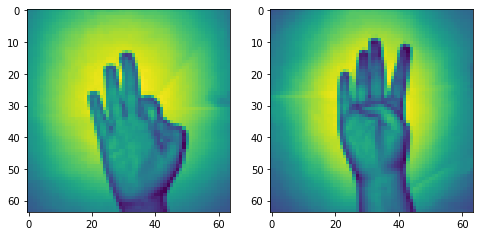

In [3]:
# Visualize some data
img_cat0 = X_cat0[:, 14].reshape((64,64))
img_cat1 = X_cat1[:, 14].reshape((64,64))

fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(img_cat0)
fig.add_subplot(1, 2, 2)
plt.imshow(img_cat1)
plt.show()

---
# Task 1. Implement sigmoid function

**1.5 points**

Implement the sigmoid function 
$a = \sigma(z) = \frac{1}{1+e^{-z}}$

In [4]:
# Task 1
def sigmoid(z):
    """
    Sigmoid function

    Arg:
    z -- A number or numpy array

    Return:
    a -- sigmoid(z)
    """

    ### START YOUR CODE ###
    a = 1 / (1 + np.exp(-z))
    ### END YOUR CODE ###
    
    return a

In [5]:
#### DO NOT CHANGE THE CODE BELOW ####
# Evaluate Task 1
print('sigmoid(-10) = {}'.format(sigmoid(-10)))
print('sigmoid(10) = {}'.format(sigmoid(10)))

sigmoid(-10) = 4.5397868702434395e-05
sigmoid(10) = 0.9999546021312976


### Expected output:

**sigmoid(-10) =** 4.5397868702434395e-05
**sigmoid(10) =** 0.9999546021312976

---

# Task 2. Initialize parameters
**1.5 points**

Implement the function that returns parameter $w$ and $b$ with zero values. The dimension of $w$ is given by the argument *dim*, i.e., it should be a $dim\times 1$ vector. Note that in numpy the dimension of $w$ should be `(dim, 1)`, but not `(dim,)`.

*Hint:* use np.zeros to initialize $w$.

In [6]:
# Task 2
def init_zeros(dim):
    """
    Initialize parameters w, b to zeros
    
    Arg:
    dim -- size of w 
    
    Returns:
    w -- a numpy vector of shape (dim, 1)
    b -- a number
    """
    ### START YOUR CODE ###
    w = np.full((dim, 1), 0.)
    b = 0.0
    ### END YOUR CODE ###
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [7]:
#### DO NOT CHANGE THE CODE BELOW ####
# Evaluate Task 2
dim = 3
w, b = init_zeros(dim)
print('w = {}'.format(w))
print('b = {}'.format(b))

w = [[0.]
 [0.]
 [0.]]
b = 0.0


### Expected output

**w =** [[0.] <br> [0.] <br> [0.]]
**b =** 0.0

---
# Task 3. Implement forward and backward computation
**3 points**

The following function conducts the forward and backward computation for logistic regression.

Given input data $X$ and label $Y$, parameters $w$ and $b$, it returns the gradients $dw$ and $db$, and the cost as well.

In the forward pass:
- The activation is computed by: $A=\sigma(w^{T}X + b)$
- Cost is computed by the formula: $-\frac{1}{m} \sum_i^{m}[y^{(i)}\log(a^{(i)}) + (1 - y^{(i)})\log(1 - a^{(i)})]$

In the backward pass:
- $dZ = A - Y$
- $dw = \frac{1}{m}XdZ^{T}$
- $db = \frac{1}{m}\text{np.sum}(dZ)$

The gradients are returned in a Python dict object, whose keys are "dw" and "db".

In [8]:
# Task 3
def forward_backward(X, Y, w, b):
    """
    Implement the forward and backward passes for logistic regression
    
    Args:
    X -- data of size (64 * 64, number of examples)
    Y -- true label vector of size (1, number of examples)
    w -- weights, a numpy array of size (64 * 64, 1)
    b -- bias, a scalar
    
    Returns:
    grads -- containing gradients, dw and db
    cost -- cost for the current pass
    """
    m = X.shape[1]
    
    # Forward
    ### START YOUR CODE ###
    A = -Y*np.log(sigmoid(np.dot(w.T,X) + b))-(1-Y)*np.log(1-sigmoid(np.dot(w.T,X) + b))
    cost = (np.sum(A))/X.shape[1]  
    ### END YOUR CODE ###
    
    # Backward
    ### START YOUR CODE ###
    dZ = np.dot(w.T,X) + b
    dw = (np.dot(X,((sigmoid(np.dot(w.T,X) + b)-Y).T)))/X.shape[1]
    db = np.sum(sigmoid(np.dot(w.T,X) + b)-Y)/X.shape[1]
    ### END YOUR CODE ###
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw': dw, 'db': db}
    
    return grads, cost

In [9]:
#### DO NOT CHANGE THE CODE BELOW ####
# Evaluate Task 3
X = np.array([[1,2,-3,0],[0.5,6,-5,0]])
Y = np.array([[1,0,1,0]])
w = np.array([[1],[2]])
b = 0
grads, cost = forward_backward(X, Y, w, b)

print('dw = {}'.format(grads['dw']))
print('db = {}'.format(grads['db']))
print('cost = {}'.format(cost))

dw = [[1.22019716]
 [2.73509556]]
db = 0.09519962669353813
cost = 6.9550195708335805


### Expected output:

**dw =** [[1.22019716] <br> [2.73509556]]
**db =** 0.09519962669353813
**cost =** 6.9550195708335805

---
# Task 4. Implement gradient descent.

**2 points**

In GD function, call `forward_backward()` function for `num_iters` times. Within each iterationl, parameters $w$ and $b$ are updated. The final parameters and a list of cost values are returned. 

*Hint: parameters are updated by $w = w - \alpha * dw$* and $b = b - \alpha * db$

In [10]:
# Task 4
def GD(X, Y, w, b, num_iters, alpha, verbose=False):
    """
    Implement gradient descent
    
    Args:
    X -- data of size (64 * 64, number of examples)
    Y -- true label vector of size (1, number of examples)
    w -- weights, a numpy array of size (64 * 64, 1)
    b -- bias, a scalar
    num_iters -- number of iterations
    alpha -- learning rate
    
    Returns:
    params -- dictionary containing the weights w and bias b
    costs -- list of all the costs computed during the training, this will be used to plot the learning curve.
    """
    costs = []
    m = X.shape[1]
    
    for i in range(num_iters):
        # Compute gradient and cost by calling forward_backward function
        ##### START YOUR CODE #####
        grads, cost = forward_backward(X,Y,w,b)
        ##### END YOUR CODE #####
        
        # Obtain dw and db
        dw = grads['dw']
        db = grads['db']
        
        # Update parameters
        ##### START YOUR CODE #####
        w = w - alpha * grads["dw"]
        b = b - alpha * grads["db"]
        ##### END YOUR CODE #####
        
        # Record and print cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
        if i % 100 == 0 and verbose:
            print("Cost after iter {}: {}".format(i, cost))
        
    params = {'w': w, 'b': b}
        
    return params, costs

In [11]:
#### DO NOT CHANGE THE CODE BELOW ####
# Evaluate Task 4
params, costs = GD(X, Y, w, b, num_iters=1000, alpha=0.01)
print('w = {}'.format(params['w']))
print('b = {}'.format(params['b']))

w = [[ 0.57327302]
 [-0.8933432 ]]
b = 0.050899211930493994


### Expected output:

**w =** [[ 0.57327302] <br> [-0.8933432 ]]
**b =** 0.05089921193049401

---
# Task 5. Implement the function to predict

**2 points**

Given new data $X$, parameters $w$ and $b$, the function makes predictions on whether each example in $X$ is 0 or 1.

*Hint*:
- First, compute the activation using $A = \sigma(w^{T}X + b)$. The resulting $A$ is a $1\times m$ matrix, $[a^{(1)},a^{(2)},\dots,a^{(m)}]$, in which $a^{(i)}$ is the probability that $x^{(i)}=1$.
- Second, you need to convert probabilities to real predictions by assigning $Y_{pred}^{(i)}$ to 1 if $a^{(1)}>0.5$, else to 0.

In [12]:
# Task 5
def predict(X, w, b):
    """
    Implement predict function
    
    Args:
    X -- data of size (64 * 64, number of examples)
    w -- weights, a numpy array of size (64 * 64, 1)
    b -- bias, a scalar
    
    Returns:
    Y_pred -- a numpy array of size (1, number of examples) containing all predictions (0/1) for all the examples in X
    """
    m = X.shape[1]
    Y_pred = np.zeros((1, m))
    
    # Compute the activation A
    ##### START YOUR CODE #####
    A = sigmoid(np.dot(w.T,X)+b)
    ##### END YOUR CODE #####
    
    # Convert probabilities to binary predictions
    for i in range(A.shape[1]):
        ##### START TODO #####
        if A[0,i]<= 0.5:
            Y_pred[0,i] = 0
        else:
            Y_pred[0,i] = 1
        ##### END TODO #####
    
    assert(Y_pred.shape == (1, m))
    
    return Y_pred

In [13]:
#### DO NOT CHANGE THE CODE BELOW ####
# Evaluate Task 5
print('predictions = {}'.format(predict(X, w, b)))
print('predictions = {}'.format(predict(X, params['w'], params['b'])))

predictions = [[1. 1. 0. 0.]]
predictions = [[1. 0. 1. 1.]]


### Expected output

**predictions=**  [[1. 1. 0. 0.]]
**predictions=** [[1. 0. 1. 1.]]


---
# Task 6. Integrate into one model

**3 points**

Integrate the above parts into one model, and apply the model on the train data ($X_{train}, Y_{train}$), and then evaluate on test data ($X_{test},Y_{test}$).

*Hint:*
- You need to call init_zeros and GD in order. You should pass the initialized parameters and all the other necessary arguments to GD.
- You also need to compute the accuray on train and test data respectively. Accuray is defined by the fraction of correct predictions over total number of examples. 

In [14]:
# Task 6
def model(X_train, Y_train, X_test, Y_test, num_iters=2000, alpha=0.005, verbose=False):
    """
    Integrated model
    
    Args:
    X_train -- training data of size (4096, 286)
    Y_train -- training label of size (1, 286)
    X_test -- test data of size (4096, 125)
    Y_test -- test label of size (1, 125)
    
    Returns:
    result -- a dict object that contains useful information
    """
    ##### START YOUR CODE #####
    # Initialize parameters to zeros
    w, b = init_zeros(X_train.shape[0])
    
    # Conduct gradient descent
    params, costs = GD(X_train, Y_train, w, b, num_iters, alpha, verbose)
    
    # Retrieve parameters
    w = params['w']
    b = params['b']
    
    # Use the parameters to predict on train and test data
    Y_pred_train = predict(X_train, params["w"],params["b"])
    Y_pred_test = predict(X_test, params["w"],params["b"])
    
    # Compute the accuracies of predicting on train/test data
    # Accuracy is the fraction of correct predictions over all examples
    acc_train = 1 - np.mean(np.abs(Y_pred_train - Y_train))
    acc_test = 1 - np.mean(np.abs(Y_pred_test - Y_test))
    ##### END YOUR CODE #####
    
    # Print train/test accuracies
    print('train accuracy: {} %'.format(100 * acc_train))
    print('test accuracy: {} %'.format(100 * acc_test))
    
    result = {
        'w': w,
        'b': b,
        'costs': costs,
        'Y_pred_test': Y_pred_test
    }
    
    return result

Cost after iter 0: 0.6931471805599454
Cost after iter 100: 0.594677382598764
Cost after iter 200: 0.5256364501984686
Cost after iter 300: 0.4747208768166399
Cost after iter 400: 0.43543641675863204
Cost after iter 500: 0.40399872095331557
Cost after iter 600: 0.3781102783926868
Cost after iter 700: 0.35630887692114854
Cost after iter 800: 0.3376209341419334
Cost after iter 900: 0.32137148224069756
Cost after iter 1000: 0.30707586651947666
Cost after iter 1100: 0.29437547177794227
Cost after iter 1200: 0.2829980734884573
Cost after iter 1300: 0.27273248705908887
Cost after iter 1400: 0.26341182071904284
train accuracy: 94.05594405594405 %
test accuracy: 88.0 %


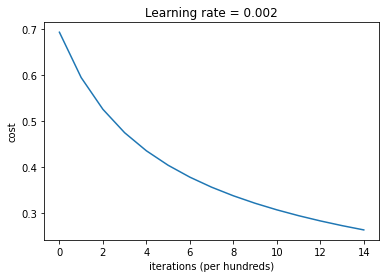

In [15]:
#### DO NOT CHANGE THE CODE BELOW ####
# Evaluate Task 6
res = model(X_train, Y_train, X_test, Y_test, num_iters=1500, alpha=0.002, verbose=True)

# Plot learning curve
costs = np.squeeze(res['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Learning rate = 0.002')
plt.show()

### Expected output

Cost after iter 0: |0.6931471805599454
Cost after iter 100: |0.5946773825987639
Cost after iter 200: |0.5256364501984687
Cost after iter 300: |0.4747208768166399
Cost after iter 400: |0.435436416758632
Cost after iter 500: |0.40399872095331557
Cost after iter 600: |0.37811027839268685
Cost after iter 700: |0.35630887692114865
Cost after iter 800: |0.3376209341419335
Cost after iter 900: |0.32137148224069756
Cost after iter 1000: |0.30707586651947666
Cost after iter 1100: |0.29437547177794215
Cost after iter 1200: |0.28299807348845724
Cost after iter 1300: |0.27273248705908887
Cost after iter 1400: |0.26341182071904296
train accuracy: | 94.05594405594405 %
test accuracy: | 88.0 %

<br>
<img src="lc.png">
<br>

---

# Task 7. Calculate evaluation metrics

**2 points**

Calculate 8 evaluation metrics out of the previous results stored in the "res" object, using the ground truth label $Y_{test}$ and the predictions on $Y_{test}$, which is stored in res['Y_pred_test'].

**NOTE**: We assumte that label y = 1 is positive, and y = 0 is negative. 

In [16]:
# Task 7.
# Calculate TP, FP, TN, FN, Accuracy, Precision, Recall, and F-1 score
# We assume that label y = 1 is positive, and y = 0 is negative
def calc_metrics(Y_test, Y_pred_test):
    """
    Calculate metrics
    
    Args:
    Y_test -- test label
    Y_pred_test -- predictions on test data
    
    Return:
    metrics -- a dict object
    """
    assert(Y_test.shape == Y_pred_test.shape)
    
    ##### START YOUR CODE #####
    TP = len([i for i in range(Y_pred_test.shape[1]) if Y_pred_test[0,i]==Y_test[0,i] if Y_pred_test[0,i]==1])
    FP = len([j for j in range(Y_pred_test.shape[1]) if Y_pred_test[0,j]!=Y_test[0,j] if Y_pred_test[0,j]==1])
    TN = len([k for k in range(Y_pred_test.shape[1]) if Y_pred_test[0,k]==Y_test[0,k] if Y_pred_test[0,k]==0])
    FN = len([l for l in range(Y_pred_test.shape[1]) if Y_pred_test[0,l]!=Y_test[0,l] if Y_pred_test[0,l]==0])
    Accuracy = len([c for c in range(Y_pred_test.shape[1]) if Y_pred_test[0,c] == Y_test[0,c]])/Y_test.shape[1]
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1 = (2*(Precision*Recall))/(Precision+Recall)
    ##### END YOUR CODE #####
    
    metrics = {
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN,
        'Accuracy': Accuracy,
        'Precision': Precision,
        'Recall': Recall,
        'F1': F1
    }
    
    return metrics

In [17]:
#### DO NOT CHANGE THE CODE BELOW ####
# Evaluate Task 7
m = calc_metrics(Y_test, res['Y_pred_test'])
print('TP = {}, FP = {}, TN = {}, FN = {}, \nAccuracy = {}, Precision = {}, Recall = {}, F1 = {}'.format(
    m['TP'], m['FP'], m['TN'], m['FN'], m['Accuracy'], m['Precision'], m['Recall'], m['F1']
))

TP = 59, FP = 11, TN = 51, FN = 4, 
Accuracy = 0.88, Precision = 0.8428571428571429, Recall = 0.9365079365079365, F1 = 0.887218045112782


### Expected output

TP = 59 | FP = 11 | TN = 51 | FN = 4
Accuracy = 0.88 | Precision = 0.8428571428571429 | Recall = 0.9365079365079365 | F1 = 0.887218045112782